In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
data.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [7]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
data.shape

(400, 3)

In [10]:
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [5]:
scaler = StandardScaler()
scaler.fit(data[['Age','EstimatedSalary']])

StandardScaler()

In [7]:
scaled_features = scaler.transform(data[['Age','EstimatedSalary']])

In [8]:
data_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, data['Purchased'], test_size=0.25, random_state= 42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [13]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64

In [15]:
print(confusion_matrix(y_test,y_pred))

[[58  5]
 [ 9 28]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.85      0.76      0.80        37

    accuracy                           0.86       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100



In [17]:
error_rate = []

# Will take some time
for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

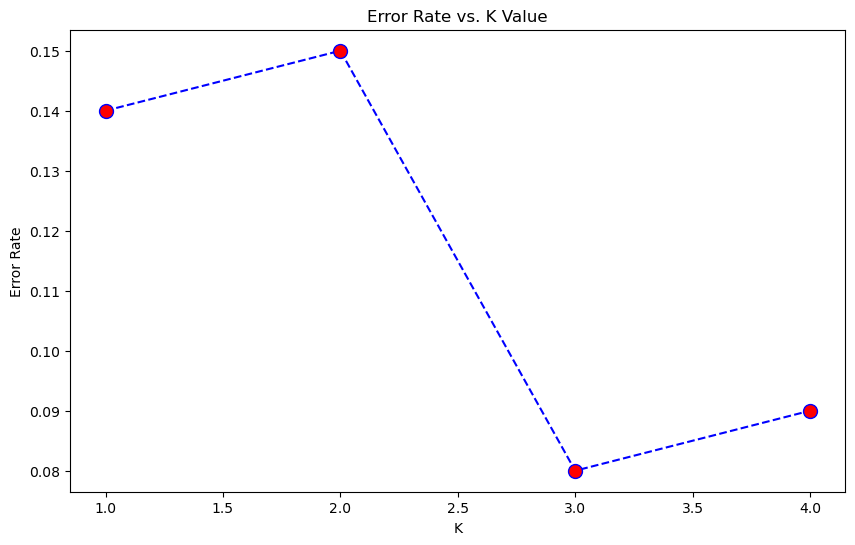

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[59  4]
 [ 4 33]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.89      0.89      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

